# Importar Librarias y datos

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [5]:
df = pd.read_parquet("output_08.parquet")

In [6]:
df.head()

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,...,tax_status_Otro,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged
0,0.853333,1.0,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.002916,...,True,False,True,False,True,False,False,False,False,False
1,0.666667,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
2,0.080000,0.0,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
4,0.733333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,False,True,False,True,False,False,False,False,False
5,0.400000,0.0,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,True


In [7]:
df.columns

Index(['age', 'gender', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'occupation_code', 'total_employed', 'gains',
       'losses', 'stocks_status', 'income_above_limit',
       'education_secondary_complete', 'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat

# Resample

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [10]:
X = df.drop("income_above_limit", axis=1)
y = df["income_above_limit"]

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

importances = model.feature_importances_
feature_names = X.columns

sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
print(sorted_features)

[('stocks_status', 0.1651285030446166), ('occupation_code', 0.13565546439066078), ('age', 0.13409296327646736), ('working_week_per_year', 0.08187137040617652), ('total_employed', 0.07208025559225438), ('education_university_graduate_or_higher', 0.06291800503834762), ('gender', 0.058692019378056015), ('gains', 0.05255974753570014), ('household_stat_Householder', 0.016926821815047826), ('losses', 0.015850392044300228), ('employment_stat', 0.013843721166016882), ('industry_code_main_Not in universe or children', 0.013630767042176665), ('education_secondary_incomplete', 0.012751305347761638), ('tax_status_Joint both under 65', 0.012245031380710996), ('education_secondary_complete', 0.011918121963057624), ('industry_code_main_Otro', 0.011890057442985226), ('wage_per_hour', 0.010074373437888048), ('marital_status_Married-civilian spouse present', 0.008047683258209112), ('marital_status_Never married', 0.007781164237549936), ('education_technical_education/university_incomplete', 0.0077287799

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)  # Apply scaling


# Elegir columnas

In [13]:
rfe = RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses',
       'stocks_status', 'household_stat_Householder'],
      dtype='object')


household stat es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [15]:
selected = ['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses', 'stocks_status', 'household_stat_Householder', 'household_stat_Other', 'country_of_birth_own_US']

# Separar por el modelo

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Probar varios numeros de Clusters

In [19]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.8729715463074906, 0.8880753316191871, 0.8748786759071636, 0.8823879987058764, 0.8723585403647386, 0.8754576259642073, 0.8682037223083079, 0.8697021812794796]


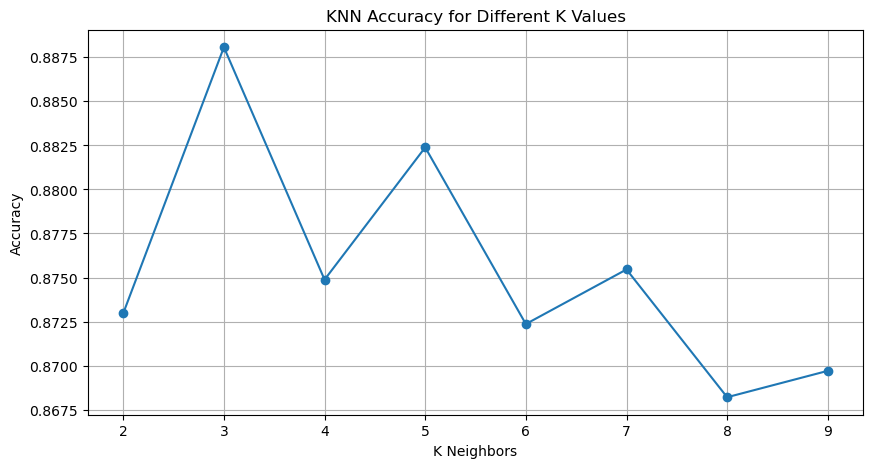

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elegir numero optimo de Clusters

### Mirando ese grafico **3** es que sale con lo mejor presicion

In [22]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 3  Accuracy: 0.8881


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89     29335
         1.0       0.91      0.87      0.89     29392

    accuracy                           0.89     58727
   macro avg       0.89      0.89      0.89     58727
weighted avg       0.89      0.89      0.89     58727



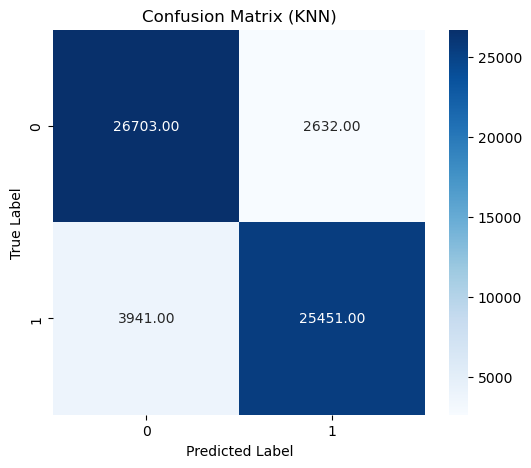

In [23]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
npv_value = TN / (TN + FN) if (TN + FN) != 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")
print(f"Negative Predictive Value (NPV): {npv_value}")

Accuracy: 0.8880753316191871
Sensibilidad: 0.8659158954817637
Especificidad: 0.9102778251235725
Negative Predictive Value (NPV): 0.8713940738806945


In [29]:
from evaluate_model import evaluate_model
from sklearn.metrics import roc_auc_score

y_probs = knn.predict_proba(X_test)[:, 1]  
roc_score = roc_auc_score(y_test, y_probs)

knn_metrics = evaluate_model("KNN oversample", y_test, y_pred, roc_score)

# Convert to DataFrame
knn_df = pd.DataFrame([knn_metrics])

knn_df.to_csv("knn_ov.csv", index=False)

Accuracy: 0.8881
Precision (Class 0): 0.8714 | Precision (Class 1): 0.9063
Recall (Class 0): 0.9103 | Recall (Class 1): 0.8659
F1 Score (Class 0): 0.8904 | F1 Score (Class 1): 0.8856
Specificity: 0.9103
Negative Predictive Value (NPV): 0.8714
ROC score: 0.9330
--------------------------------------------------


# Elegir columanas con solver=Saga

In [32]:
rfe = RFE(estimator=LogisticRegression(solver='saga', max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'occupation_code', 'gains', 'losses',
       'stocks_status', 'employment_commitment_Full-time schedules'],
      dtype='object')


household stat es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [34]:
selected = ['age', 'working_week_per_year', 'gains', 'losses', 'stocks_status',
       'migration_code_change_in_msa_MSA to MSA',
       'migration_code_change_in_msa_Otro',
       'migration_code_change_in_msa_unchanged',
       'migration_code_change_in_reg_Otro',
       'migration_code_change_in_reg_unchanged', 'country_of_birth_own_US']

# Separar por el modelo

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Probar varios numeros de Clusters

In [38]:
# La precisión sigue aumentando. Aumente el alcance y la visualización.

accuracies = []

for K in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    #print(f"K value: {K}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}\n")

print(accuracies)

[0.8895056788189419, 0.9012890152740647, 0.8952611235036695, 0.8983091252745756, 0.8926728761898275, 0.8960954927035265, 0.8934561615611218, 0.8955165426464828]


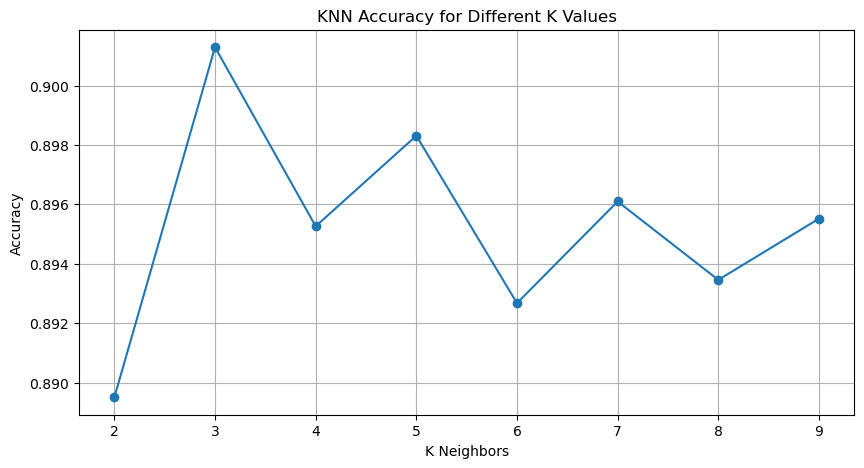

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), accuracies, marker='o', linestyle='-')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
#plt.xticks(k_values)
plt.grid(True)
plt.show()

# Elegir numero optimo de Clusters

### Mirando ese grafico **3** es que sale con lo mejor presicion

In [41]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 3  Accuracy: 0.9013


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     29335
         1.0       0.93      0.87      0.90     29392

    accuracy                           0.90     58727
   macro avg       0.90      0.90      0.90     58727
weighted avg       0.90      0.90      0.90     58727



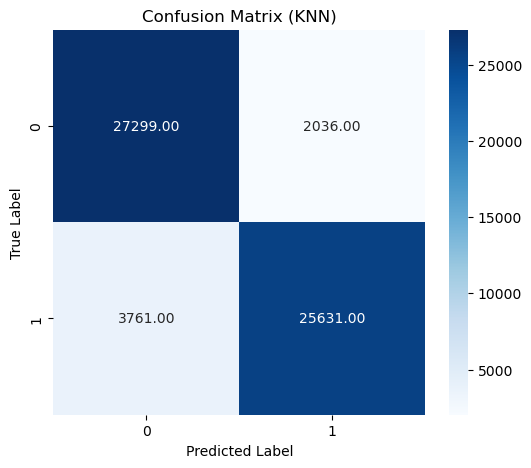

In [42]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [43]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
npv_value = TN / (TN + FN) if (TN + FN) != 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")
print(f"Negative Predictive Value (NPV): {npv_value}")

Accuracy: 0.9012890152740647
Sensibilidad: 0.8720400108873163
Especificidad: 0.9305948525651951
Negative Predictive Value (NPV): 0.8789117836445589


In [44]:
from evaluate_model import evaluate_model
from sklearn.metrics import roc_auc_score

y_probs = knn.predict_proba(X_test)[:, 1]  
roc_score = roc_auc_score(y_test, y_probs)

knn_metrics = evaluate_model("KNN oversample saga", y_test, y_pred, roc_score)

# Convert to DataFrame
knn_df = pd.DataFrame([knn_metrics])

knn_df.to_csv("knn_ov_saga.csv", index=False)

Accuracy: 0.9013
Precision (Class 0): 0.8789 | Precision (Class 1): 0.9264
Recall (Class 0): 0.9306 | Recall (Class 1): 0.8720
F1 Score (Class 0): 0.9040 | F1 Score (Class 1): 0.8984
Specificity: 0.9306
Negative Predictive Value (NPV): 0.8789
ROC score: 0.9394
--------------------------------------------------
